In [1]:
import sys
import os
# Add "mitsuba" library path to the system path
root = os.path.abspath('../..')
sys.path.insert(0, os.path.abspath(f'{root}/ext/mitsuba3/build/python'))

# Import mitsuba and set the variant
# To set a variant, you need to have set it in the mitsuba.conf file
# https://mitsuba.readthedocs.io/en/latest/src/key_topics/variants.html
import mitsuba as mi
mi.set_variant('llvm_ad_rgb')

# Import the mitsuba-transient extension
# adds extra functionality to existing Mitsuba classes
sys.path.insert(0, os.path.abspath(f'{root}'))
import mitransient as mitr

In [2]:
# Load XML file
# You can also use mi.load_dict and pass a Python dict object
# but it is probably much easier for your work to use XML files
scene = mi.load_file(os.path.abspath('simple/simple_angular_1light.xml'))


# Render the scene and develop the data
# Because mitsuba works with Dr.JIT, this cell will execute
# very fast. But when you actually read the variables
# it will actually start computing everyting (and take a while).
data_steady, data_transient = mi.render(scene, spp=64)

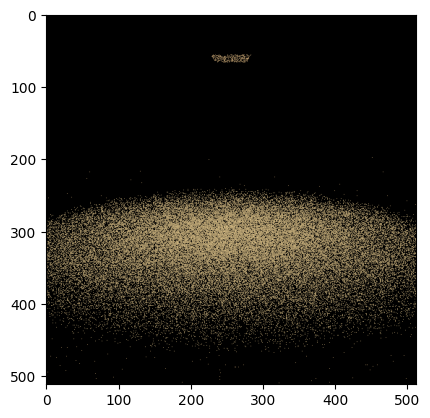

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow((data_steady / np.max(data_steady)) ** (1 / 4.0))
plt.show()

In [ ]:
params = mi.traverse(scene)
params['sensor.to_world'] = mi.ScalarTransform4f.look_at(
    origin=mi.llvm_rgb.ScalarPoint3f(0.01, 30, 0),
    target=mi.llvm_rgb.ScalarPoint3f(0, 0, 0),
    up=mi.llvm_rgb.ScalarPoint3f(0, 1, 0)
)
params.update()


# Render the scene and develop the data
# Because mitsuba works with Dr.JIT, this cell will execute
# very fast. But when you actually read the variables
# it will actually start computing everyting (and take a while).
data_steady, data_transient = mi.render(scene, spp=16)

plt.imshow((data_steady / np.max(data_steady)) ** (1 / 4.0))
plt.show()

: 

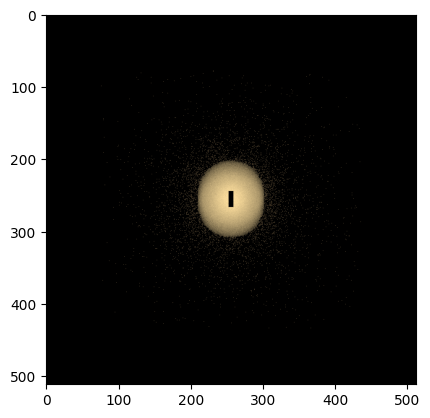

In [ ]:
params = mi.traverse(scene)
params['sensor.to_world'] = mi.ScalarTransform4f.look_at(
    origin=mi.llvm_rgb.ScalarPoint3f(0.01, 200, 0),
    target=mi.llvm_rgb.ScalarPoint3f(0, 0, 0),
    up=mi.llvm_rgb.ScalarPoint3f(0, 1, 0)
)
params.update();

data_steady, data_transient = mi.render(scene, spp=16)

plt.imshow((data_steady / np.max(data_steady)) ** (1 / 4.0))
plt.show()